## Task 1

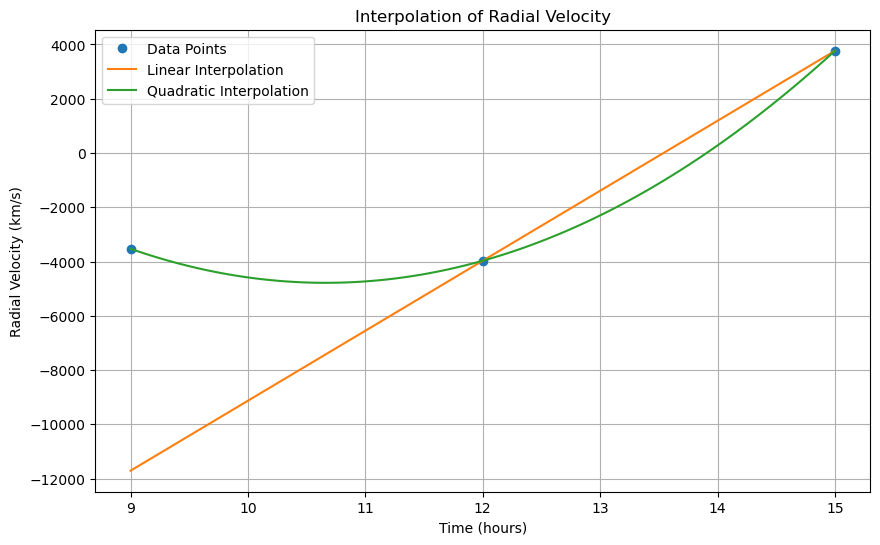

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Data points
t_data = np.array([9.00, 12.00, 15.00])  # Time in hours
v_data = np.array([-3530, -3970, 3770])  # Radial velocity in km/s

# Convert time to seconds for calculations
t_data_sec = t_data * 3600

# Linear interpolation between the last two points
def v_linear(t):
    t1 = t_data_sec[1]
    v1 = v_data[1]
    t2 = t_data_sec[2]
    v2 = v_data[2]
    return v1 + (v2 - v1) * (t - t1) / (t2 - t1)

# Quadratic interpolation using all three points
A = np.array([
    [t_data_sec[0]**2, t_data_sec[0], 1],
    [t_data_sec[1]**2, t_data_sec[1], 1],
    [t_data_sec[2]**2, t_data_sec[2], 1]
])

coefficients = np.linalg.solve(A, v_data)
a, b, c = coefficients

def v_quadratic(t):
    return a * t**2 + b * t + c

# Time range for plotting
t_range = np.linspace(9, 15, 100)  # Time in hours
t_range_sec = t_range * 3600  # Convert to seconds

# Calculate interpolated values
v_linear_range = [v_linear(t) for t in t_range_sec]
v_quadratic_range = [v_quadratic(t) for t in t_range_sec]

# Plot the data points and interpolated functions
plt.figure(figsize=(10, 6))
plt.plot(t_data, v_data, 'o', label='Data Points')
plt.plot(t_range, v_linear_range, label='Linear Interpolation')
plt.plot(t_range, v_quadratic_range, label='Quadratic Interpolation')
plt.xlabel('Time (hours)')
plt.ylabel('Radial Velocity (km/s)')
plt.title('Interpolation of Radial Velocity')
plt.legend()
plt.grid(True)
plt.show()


Linear interpolation is simpler and easier to implement, quadratic interpolation provides a more accurate and smoother representation of the data, especially around the zero crossing (periapsis). This makes quadratic interpolation more suitable for data with non-linear trends.

## Task 2

In [18]:
# Data points
t_data = np.array([9.00, 12.00, 15.00]) * 3600  # Convert hours to seconds
v_data = np.array([-3530, -3970, 3770])

# Linear interpolation function
def v_linear(t):
    t1 = t_data[1]
    v1 = v_data[1]
    t2 = t_data[2]
    v2 = v_data[2]
    return v1 + (v2 - v1) * (t - t1) / (t2 - t1)

# Derivative of the linear interpolation function
def v_linear_derivative(t):
    t1 = t_data[1]
    v1 = v_data[1]
    t2 = t_data[2]
    v2 = v_data[2]
    return (v2 - v1) / (t2 - t1)

# Quadratic interpolation coefficients
A = np.array([
    [t_data[0]**2, t_data[0], 1],
    [t_data[1]**2, t_data[1], 1],
    [t_data[2]**2, t_data[2], 1]
])

coefficients = np.linalg.solve(A, v_data)
a, b, c = coefficients

# Quadratic interpolation function
def v_quadratic(t):
    return a * t**2 + b * t + c

# Derivative of the quadratic interpolation function
def v_quadratic_derivative(t):
    return 2 * a * t + b

# Newton-Raphson method
def newton_raphson(f, f_derivative, initial_guess, tolerance=1e-6, max_iterations=100):
    t = initial_guess
    for _ in range(max_iterations):
        f_value = f(t)
        f_derivative_value = f_derivative(t)
        if abs(f_value) < tolerance:
            return t
        t = t - f_value / f_derivative_value
    return t

# Initial guess for the root (e.g., midpoint between t2 and t3)
initial_guess = (t_data[1] + t_data[2]) / 2

# Find the root for linear interpolation
tp_linear = newton_raphson(v_linear, v_linear_derivative, initial_guess)

# Find the root for quadratic interpolation
tp_quadratic = newton_raphson(v_quadratic, v_quadratic_derivative, initial_guess)

# Convert the results back to hours
tp_linear_hours = tp_linear / 3600
tp_quadratic_hours = tp_quadratic / 3600

print(f"Time at which v_rad(t) = 0 using linear interpolation: {tp_linear_hours} hours")
print(f"Time at which v_rad(t) = 0 using quadratic interpolation: {tp_quadratic_hours} hours")


Time at which v_rad(t) = 0 using linear interpolation: 13.53875968992248 hours
Time at which v_rad(t) = 0 using quadratic interpolation: 13.906037705857676 hours


quadratic interpolation is more likely to be accurate because it can capture the non-linear, curved nature of the asteroid's motion under Earth's gravity. This makes it more suitable for estimating critical points such as the periapsis, where the velocity changes sign and the motion is more complex. Linear interpolation, while simpler, is less accurate for this type of data due to its inability to capture the curvature and varying rates of change.

## Task 3

In [19]:
# Data points
t_data = np.array([9.00, 12.00, 15.00])
r_data = np.array([77800, 37260, 26360])

# Times tp from Problem 2
tp_linear_hours = 13.53875968992248
tp_quadratic_hours = 13.906037705857676

def r_linear(t, t_data, r_data):
    idx = np.searchsorted(t_data, t)
    if idx == 0:
        idx += 1
    elif idx == len(t_data):
        idx -= 1

    t1 = t_data[idx - 1]
    r1 = r_data[idx - 1]
    t2 = t_data[idx]
    r2 = r_data[idx]

    return r1 + (r2 - r1) * (t - t1) / (t2 - t1)

A = np.array([
    [t_data[0]**2, t_data[0], 1],
    [t_data[1]**2, t_data[1], 1],
    [t_data[2]**2, t_data[2], 1]
])

coefficients = np.linalg.solve(A, r_data)
a, b, c = coefficients

def r_quadratic(t):
    return a * t**2 + b * t + c

r_peri_linear = r_linear(tp_linear_hours, t_data, r_data)
r_peri_quadratic = r_quadratic(tp_quadratic_hours)

print(f"Periapsis radius using linear interpolation: {r_peri_linear} km")
print(f"Periapsis radius using quadratic interpolation: {r_peri_quadratic} km")


Periapsis radius using linear interpolation: 31669.173126614987 km
Periapsis radius using quadratic interpolation: 26901.210033975774 km


In [20]:
G = 6.6743e-11
M = 5.972e24
GM = G * M

r = 37260 * 1e3
v_rad = -3970 * 1e3
v_tan = 3210 * 1e3

v = np.sqrt(v_rad**2 + v_tan**2)

ell = r * v_tan

a = 1 / (2 / r - v**2 / GM)

e = (r * v**2 / GM) - 1

r_peri_analytical = (ell**2) / (GM * (1 + e))

r_peri_analytical_km = r_peri_analytical / 1e3

print(f"Periapsis radius using analytical method: {r_peri_analytical_km} km")


Periapsis radius using analytical method: 14729.743564166509 km


The analytical method provides a accurate estimate of the periapsis radius under ideal conditions. However, the interpolated values from linear and quadratic methods can deviate significantly due to the assumptions inherent in these techniques. The quadratic interpolation, while better than linear, still may not fully capture the non-linear dynamics of the asteroid's orbit, leading to discrepancies in the results.

To improve the accuracy of the interpolated values, more data points and/or higher-order interpolation methods like splines could be used.

## Task 4

In [21]:
t_data = np.array([9.00, 12.00, 15.00])
r_data = np.array([77800, 37260, 26360])
v_tan_data = np.array([1540, 3210, 4530])

tp_linear_hours = 13.53875968992248
tp_quadratic_hours = 13.906037705857676

def trapezoidal_rule(t, r, v_tan):
    integrand = 0.5 * r * v_tan
    return np.trapz(integrand, t)

A_12 = trapezoidal_rule(t_data[:2], r_data[:2], v_tan_data[:2])

t_interval_2tp = np.linspace(12.00, tp_linear_hours, 100)
r_interval_2tp = np.interp(t_interval_2tp, t_data, r_data)
v_tan_interval_2tp = np.interp(t_interval_2tp, t_data, v_tan_data)

A_2tp = trapezoidal_rule(t_interval_2tp, r_interval_2tp, v_tan_interval_2tp)

t_12_seconds = (t_data[1] - t_data[0]) * 3600
t_2tp_seconds = (tp_linear_hours - t_data[1]) * 3600

average_rate_12 = A_12 / t_12_seconds
average_rate_2tp = A_2tp / t_2tp_seconds

print(f"Swept area between Point 1 and Point 2: {A_12} km^2")
print(f"Swept area between Point 2 and periapsis: {A_2tp} km^2")
print(f"Average rate of area swept between Point 1 and Point 2: {average_rate_12} km^2/s")
print(f"Average rate of area swept between Point 2 and periapsis: {average_rate_2tp} km^2/s")

Swept area between Point 1 and Point 2: 179562450.0 km^2
Swept area between Point 2 and periapsis: 93851273.19844814 km^2
Average rate of area swept between Point 1 and Point 2: 16626.152777777777 km^2/s
Average rate of area swept between Point 2 and periapsis: 16942.085422054028 km^2/s
